# Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

# Importing Modules:-

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Loading the data:-

In [2]:
df=pd.read_csv("Loan_Application.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see that there are categorical colums and numerical columns in our dataset so to make a model we will have to convert the categorical columns into numerical columns.

In [5]:
categorical_columns=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
numerical_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
print("Categorical Columns:- ",categorical_columns)
print("Numerical Columns:- ",numerical_columns)

Categorical Columns:-  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Numerical Columns:-  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [6]:
df.shape

(614, 13)

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

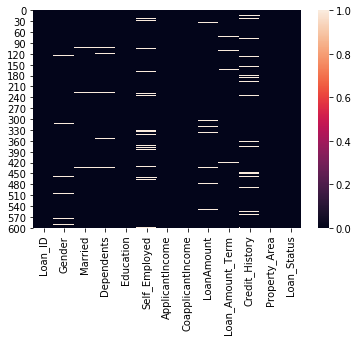

In [8]:
sns.heatmap(df.isnull())
plt.show()

We can Observe that the dataset has certain null values so we will treat it in further steps

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Loan_Status'].unique()

array([1, 0], dtype=int64)

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


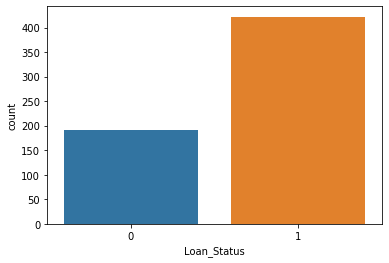

In [12]:
sns.countplot(df['Loan_Status'])
plt.show()

Loan of Maximum People are approved.

We can see that there is not much of a Class Imbalance and will not effect model working so we will not do anything.

# Treating Null Values:-

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

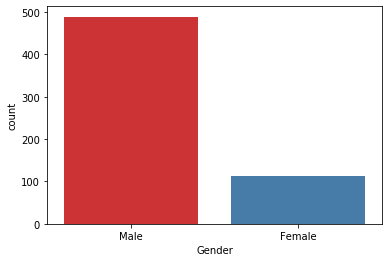

Percent of missing "Gender" records is 2.12%


In [14]:
sns.countplot(df['Gender'],palette='Set1')
plt.show()
print('Percent of missing "Gender" records is %.2f%%' %((df['Gender'].isnull().sum()/df.shape[0])*100))

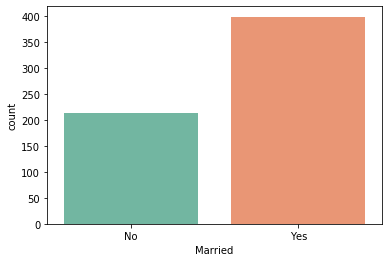

Percent of missing "Married" records is 0.49%


In [15]:
sns.countplot(df['Married'],palette='Set2')
plt.show()
print('Percent of missing "Married" records is %.2f%%' %((df['Married'].isnull().sum()/df.shape[0])*100))

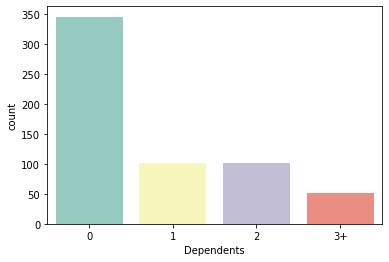

Percent of missing "Dependents" records is 2.44%


In [16]:
sns.countplot(df['Dependents'],palette='Set3')
plt.show()
print('Percent of missing "Dependents" records is %.2f%%' %((df['Dependents'].isnull().sum()/df.shape[0])*100))

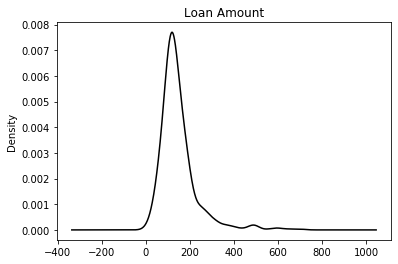

Percent of missing "LoanAmount" records is 3.58%


In [17]:
df["LoanAmount"].plot(kind='density',color='black',subplots=False)
plt.title("Loan Amount")
plt.show()
print('Percent of missing "LoanAmount" records is %.2f%%' %((df['LoanAmount'].isnull().sum()/df.shape[0])*100))

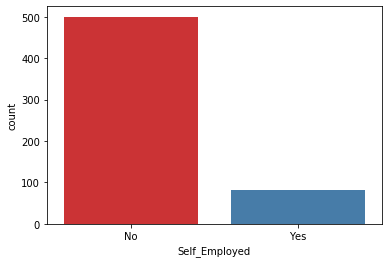

Percent of missing "Self_Employed" records is 5.21%


In [18]:
sns.countplot(df['Self_Employed'],palette='Set1')
plt.show()
print('Percent of missing "Self_Employed" records is %.2f%%' %((df['Self_Employed'].isnull().sum()/df.shape[0])*100))

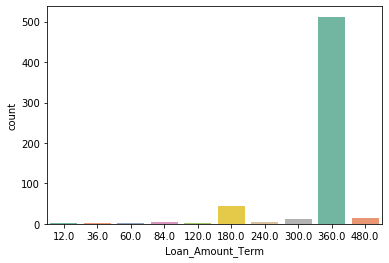

Percent of missing "Loan_Amount_Term" records is 2.28%


In [19]:
sns.countplot(df['Loan_Amount_Term'],palette='Set2')
plt.show()
print('Percent of missing "Loan_Amount_Term" records is %.2f%%' %((df['Loan_Amount_Term'].isnull().sum()/df.shape[0])*100))

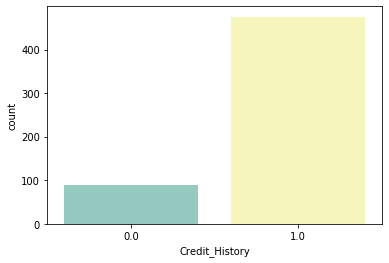

Percent of missing "Credit_History" records is 8.14%


In [20]:
sns.countplot(df['Credit_History'],palette='Set3')
plt.show()
print('Percent of missing "Credit_History" records is %.2f%%' %((df['Credit_History'].isnull().sum()/df.shape[0])*100))

From the Above Observation on Plots of Missing Values we can Say:-

1. If "Gender" is missing for a given row, I'll impute with Male (most common answer).
2. If "Married" is missing for a given row, I'll impute with yes (most common answer).
3. If "Dependents" is missing for a given row, I'll impute with 0 (most common answer).
4. If "Self_Employed" is missing for a given row, I'll impute with no (most common answer).
5. If "LoanAmount" is missing for a given row, I'll impute with mean of data.
6. If "Loan_Amount_Term" is missing for a given row, I'll impute with 360 (most common answer).
7. If "Credit_History" is missing for a given row, I'll impute with 1.0 (most common answer).

In [21]:
df_new= df.copy()
df_new['Gender'].fillna(df_new['Gender'].value_counts().idxmax(), inplace=True)
df_new['Married'].fillna(df_new['Married'].value_counts().idxmax(), inplace=True)
df_new['Dependents'].fillna(df_new['Dependents'].value_counts().idxmax(), inplace=True)
df_new['Self_Employed'].fillna(df_new['Self_Employed'].value_counts().idxmax(), inplace=True)
df_new["LoanAmount"].fillna(df_new["LoanAmount"].mean(skipna=True), inplace=True)
df_new['Loan_Amount_Term'].fillna(df_new['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
df_new['Credit_History'].fillna(df_new['Credit_History'].value_counts().idxmax(), inplace=True)

In [22]:
df_new.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now the Null Values are Removed.

In [23]:
df_new.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049,0.687296
std,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [24]:
df_new.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [25]:
df_new['Gender'] = df_new['Gender'].replace({'Female':0,'Male':1})
df_new['Married'] = df_new['Married'].replace({'No':0,'Yes':1})
df_new['Dependents'] = df_new['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3})
df_new['Education'] = df_new['Education'].replace({'Not Graduate':0,'Graduate':1})
df_new['Self_Employed'] = df_new['Self_Employed'].replace({'No':0,'Yes':1})
df_new['Property_Area'] = df_new['Property_Area'].replace({'Semiurban':0,'Urban':1,'Rural':2})
df_new.drop('Loan_ID',axis=1,inplace=True)

In [26]:
df_new.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int32
dtype: object

# Checking Correlation:-

In [27]:
corr=df_new.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,0.009170,0.109521,0.017987
Married,0.364569,1.000000,0.334216,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100912,0.010938,-0.007281,0.091478
Dependents,0.172914,0.334216,1.000000,-0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.040160,-0.001601,0.010118
Education,-0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140760,0.062290,0.166998,0.073928,0.073658,-0.066740,0.085884
Self_Employed,-0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.001550,0.007124,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.018615,0.017321,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.011134,0.019087,-0.059187
LoanAmount,0.107930,0.147141,0.163106,0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.001431,0.029024,-0.036416
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.004705,-0.016086,-0.022549
Credit_History,0.009170,0.010938,-0.040160,0.073658,-0.001550,-0.018615,0.011134,-0.001431,-0.004705,1.000000,-0.033102,0.540556


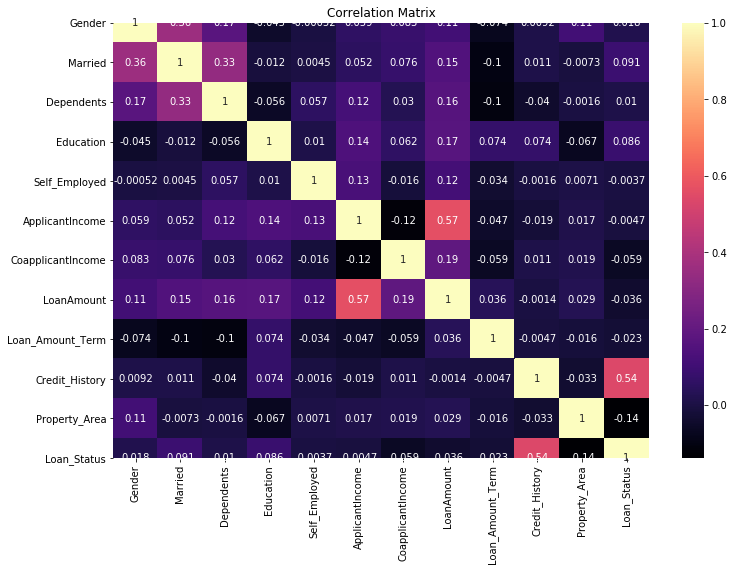

In [28]:
plt.figure(figsize=(12,8))
plt.title("Correlation Matrix")
sns.heatmap(corr,annot=True,cmap='magma')
plt.show()

In [29]:
corr['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Education            0.085884
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Property_Area       -0.137545
Name: Loan_Status, dtype: float64

We can see that there is very weak relationship with the target varaible with many columns but as the dataset is small we will not remove any column otherwise it will effect our model accuracy.

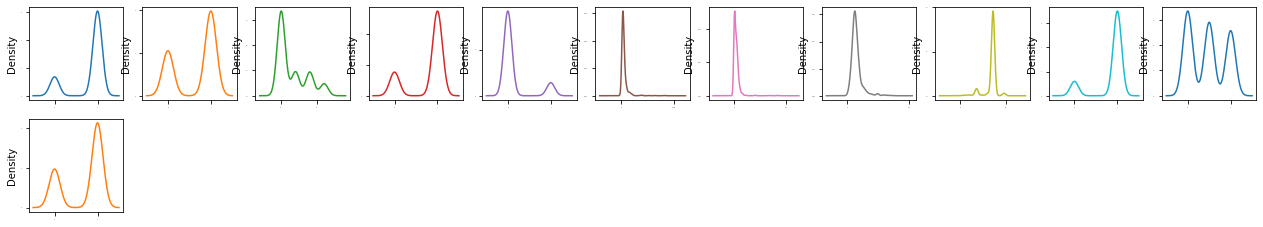

In [30]:
df_new.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False, fontsize=1, figsize=(22,12))
plt.show()

In [31]:
# df_new.skew()

We can see that their is skewness in almost every column So we will treat the skewness using Power Transform.

In [32]:
# from sklearn.preprocessing import power_transform
# final_df=power_transform(df_new)
# final_df=pd.DataFrame(final_df,columns=df_new.columns)

In [33]:
# final_df.skew()

# Checking Outliers:-

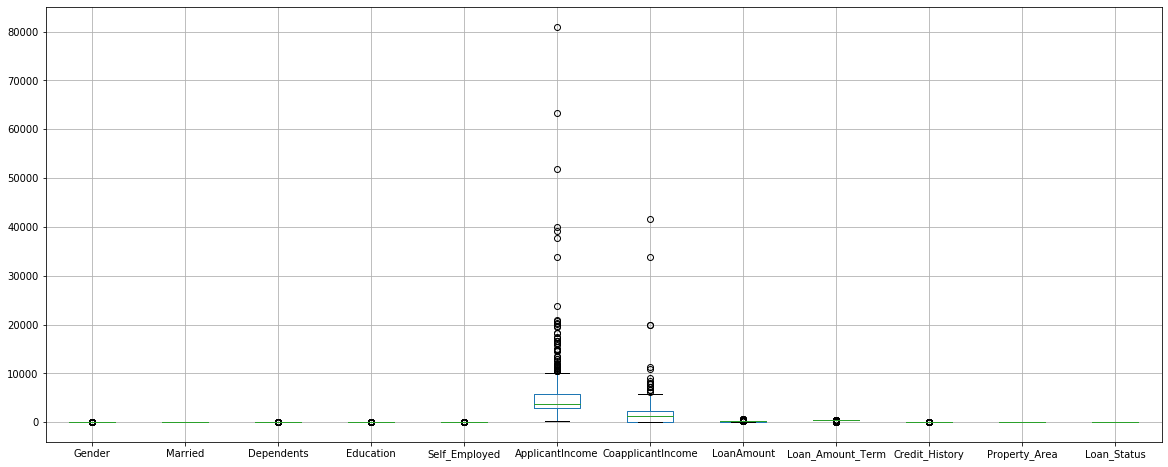

In [34]:
df_new.boxplot(figsize=(20,8))
plt.show()

We will not remove any Outliers from the dataset because applicant income can be high and loan amount can also be high and the other outliers are not being considered because they are in the columns where there can be no outliers.

# EDA:-

## Categorical Values:-

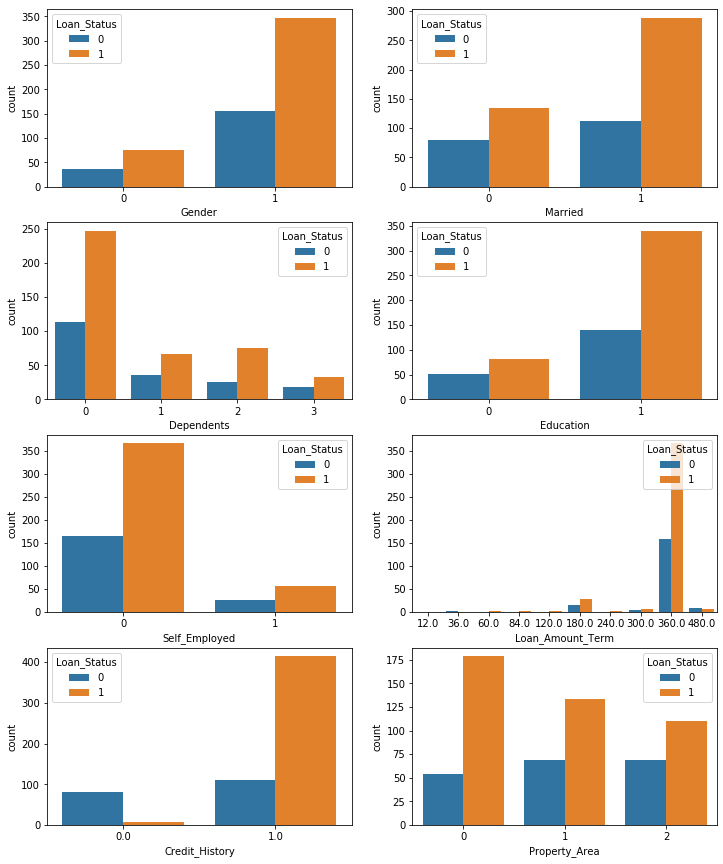

In [35]:
fig,ax=plt.subplots(4,2,figsize=(12,15))
sns.countplot(x='Gender',data=df_new,hue='Loan_Status',ax=ax[0,0])
sns.countplot(x='Married',data=df_new,hue='Loan_Status',ax=ax[0,1])
sns.countplot(x='Dependents',data=df_new,hue='Loan_Status',ax=ax[1,0])
sns.countplot(x='Education',data=df_new,hue='Loan_Status',ax=ax[1,1])
sns.countplot(x='Self_Employed',data=df_new,hue='Loan_Status',ax=ax[2,0])
sns.countplot(x='Loan_Amount_Term',data=df_new,hue='Loan_Status',ax=ax[2,1])
sns.countplot(x='Credit_History',data=df_new,hue='Loan_Status',ax=ax[3,0])
sns.countplot(x='Property_Area',data=df_new,hue='Loan_Status',ax=ax[3,1])
plt.show()

OBSERVATIONS:-

1. We can Observe that 2/3rd of the loan is Approved for both Male and Females.
2. There Are More Males than Females.
3. 2/3rd of the population in the datset is married and are more likely to get loan
4. Majority of the population have 0 Dependents and they are also getting approved for loan.
5. Almost 2/3rd of the population is graduate and graduate are more likely to get approved for loan.
6. Very less population is self employed among which most of them are getting loan.
7. More applicants from Semi-urban are likely to be granted loans.
8. Applicant who have credit_history are more likely to get loan.
9. Majority of the loans taken are for a period of 360 days.

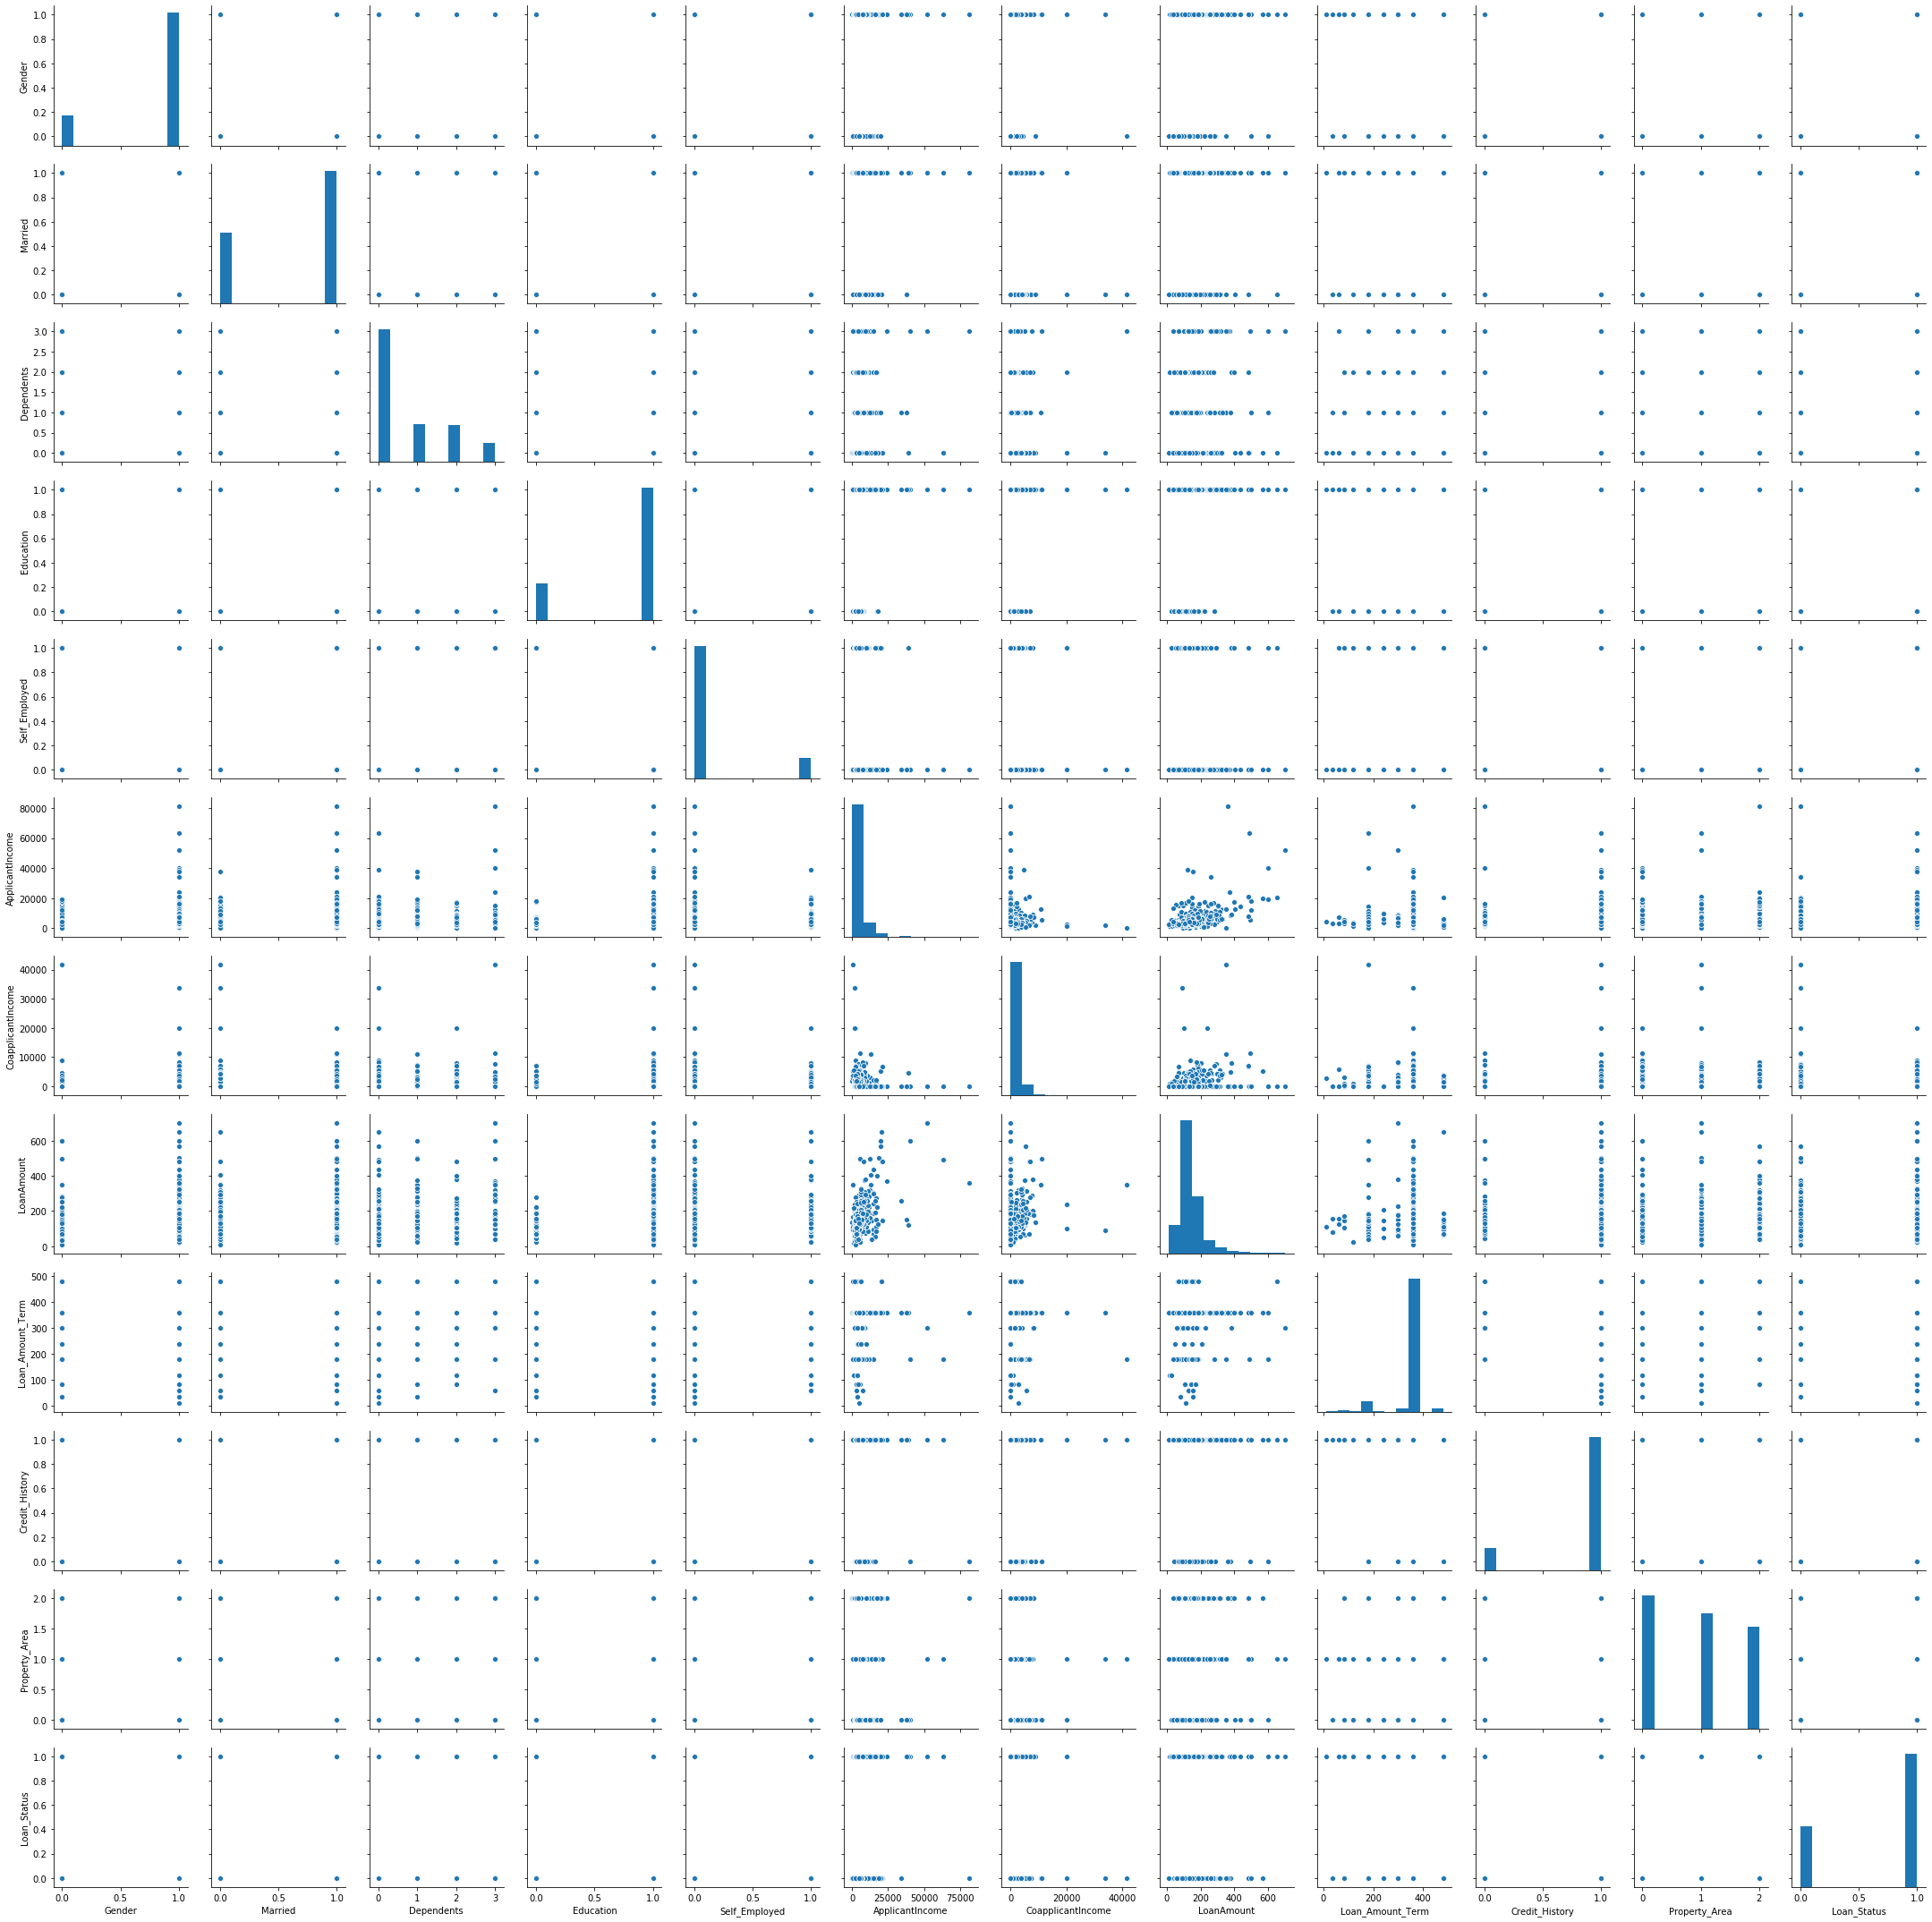

In [36]:
sns.pairplot(df_new)
plt.show()

In [37]:
x=df_new.drop('Loan_Status',axis=1)
y=df_new['Loan_Status']

# Creating train_test_split:-

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=104)

# Finding Best Random State:-

In [39]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8702702702702703  on Random_state  104


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [42]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8
[[ 26  35]
 [  2 122]]
              precision    recall  f1-score   support

           0       0.93      0.43      0.58        61
           1       0.78      0.98      0.87       124

    accuracy                           0.80       185
   macro avg       0.85      0.71      0.73       185
weighted avg       0.83      0.80      0.77       185



In [43]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.6648648648648648
[[30 31]
 [31 93]]
              precision    recall  f1-score   support

           0       0.49      0.49      0.49        61
           1       0.75      0.75      0.75       124

    accuracy                           0.66       185
   macro avg       0.62      0.62      0.62       185
weighted avg       0.66      0.66      0.66       185



In [44]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7837837837837838
[[ 29  32]
 [  8 116]]
              precision    recall  f1-score   support

           0       0.78      0.48      0.59        61
           1       0.78      0.94      0.85       124

    accuracy                           0.78       185
   macro avg       0.78      0.71      0.72       185
weighted avg       0.78      0.78      0.77       185



In [45]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6648648648648648
[[  0  61]
 [  1 123]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.67      0.99      0.80       124

    accuracy                           0.66       185
   macro avg       0.33      0.50      0.40       185
weighted avg       0.45      0.66      0.54       185



We are getting the Best accuracy for LogisticRegression Classifier. Now we will calculate the cross val score

## Calculating Cross Validation Score:-

In [46]:
scr=cross_val_score(LR,x,y,cv=5)
print("Cross Validation Score for Logistic Regression model :",scr.mean())

Cross Validation Score for Logistic Regression model : 0.8029454884712782


In [47]:
scr=cross_val_score(dt,x,y,cv=5)
print("Cross Validation Score for DecisionTree model :",scr.mean())

Cross Validation Score for DecisionTree model : 0.6971478075436492


In [48]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross Validation Score for RandomForest model :",scr.mean())

Cross Validation Score for RandomForest model : 0.7817672930827669


In [49]:
scr=cross_val_score(svc,x,y,cv=5)
print("Cross Validation Score for SVC model :",scr.mean())

Cross Validation Score for SVC model : 0.6872984139677463


The Least Difference is between the accuracy and cross val score is of the logistic regression model . So this is our best model . Now we will do the HyperParameter Tuning of our selected model for better accuracy .

## Hyper Parameter Tuning:-

In [50]:
from sklearn.model_selection import GridSearchCV

In [55]:
parameters={'penalty':['l1','l2','elasticnet','none'],
          'tol':np.arange(2,10)}

In [56]:
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5)

In [57]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'tol': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [58]:
GCV.best_params_

{'penalty': 'l2', 'tol': 9}

In [59]:
mod=LogisticRegression(penalty='l2', tol=9, random_state=104)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

80.0


In [61]:
pred=LR.predict(x_test)
predictions=pd.DataFrame({'Predictions':pred,'Real Value':y_test})
predictions

,Predictions,Real Value
347,1,1
77,1,0
364,1,1
305,1,0
581,0,0
235,1,1
521,1,1
104,1,1
121,1,1
236,1,0


# Saving Our Model:-

In [62]:
import joblib
joblib.dump(LR,'Loan_prediction.pk1')

['Loan_prediction.pk1']

# Loading the Saved Model:-

In [63]:
save=joblib.load('Loan_prediction.pk1')
prediction=save.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8
[[ 26  35]
 [  2 122]]
              precision    recall  f1-score   support

           0       0.93      0.43      0.58        61
           1       0.78      0.98      0.87       124

    accuracy                           0.80       185
   macro avg       0.85      0.71      0.73       185
weighted avg       0.83      0.80      0.77       185



In [64]:
prediction

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1])